In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from IPython import get_ipython

from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
get_ipython().run_line_magic('matplotlib', 'inline')


In [18]:
Boston = pd.read_csv('C:/Users/dgarg/Desktop/aging/PipeDataset.csv')
Boston.head()

,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
0,151,1682,4880.722405,928.382088,35,49,1,0,0,0,0,0,43
1,80,3865,1940.107485,98.755500,41,120,1,0,0,0,0,0,24
2,74,1659,2599.669467,751.541033,27,126,1,0,0,0,0,0,15
3,132,3196,1468.885640,570.858471,13,68,0,1,0,0,0,0,23
4,125,2374,746.420442,1066.889783,5,75,0,0,1,0,0,0,2


In [19]:
boston1 = Boston

In [20]:
Boston = boston1

In [21]:
Boston.iloc[0]

PipeAge                   151.000000
PipeDiameter             1682.000000
PipeLength               4880.722405
PipeBreakage              928.382088
PipeWallLos                35.000000
ExpectedPipeAge            49.000000
Material_CI                 1.000000
Material_Concrete           0.000000
Material_Ductile Iron       0.000000
Material_PVC                0.000000
Material_Polyethene         0.000000
Material_Steel              0.000000
PipeRUL                    43.000000
Name: 0, dtype: float64

In [22]:
#Boston = Boston[1:]
print(Boston.shape)
Boston.head(2)

(10000, 13)


,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
0,151,1682,4880.722405,928.382088,35,49,1,0,0,0,0,0,43
1,80,3865,1940.107485,98.755500,41,120,1,0,0,0,0,0,24


In [23]:
Boston.dtypes

PipeAge                    int64
PipeDiameter               int64
PipeLength               float64
PipeBreakage             float64
PipeWallLos                int64
ExpectedPipeAge            int64
Material_CI                int64
Material_Concrete          int64
Material_Ductile Iron      int64
Material_PVC               int64
Material_Polyethene        int64
Material_Steel             int64
PipeRUL                    int64
dtype: object

In [24]:
Boston.describe()

,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76.07370,1953.35430,3291.035385,547.255449,22.591500,123.92630,0.547300,0.112400,0.048000,0.046700,0.068200,0.066000,22.349400
std,43.94604,1109.98577,1896.660407,317.846802,12.786429,43.94604,0.497783,0.315874,0.213777,0.211006,0.252101,0.248295,12.758182
min,1.00000,20.00000,0.812309,0.284159,1.000000,48.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,38.00000,1000.00000,1632.562399,268.842908,11.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,77.00000,1954.50000,3272.531037,549.593356,23.000000,123.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
75%,114.00000,2904.00000,4943.290532,822.979965,34.000000,162.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
max,152.00000,3899.00000,6556.926577,1098.158096,44.000000,199.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000


In [25]:
Boston.isnull().sum()

PipeAge                  0
PipeDiameter             0
PipeLength               0
PipeBreakage             0
PipeWallLos              0
ExpectedPipeAge          0
Material_CI              0
Material_Concrete        0
Material_Ductile Iron    0
Material_PVC             0
Material_Polyethene      0
Material_Steel           0
PipeRUL                  0
dtype: int64

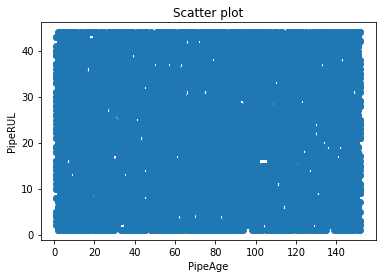

In [26]:
plt.scatter(Boston['PipeAge'], Boston['PipeRUL'])
plt.title('Scatter plot')
plt.xlabel('PipeAge')
plt.ylabel('PipeRUL')
plt.show()


In [27]:
X_Boston = Boston.iloc[ :,0:12]
Y_Boston = Boston.iloc[ :,12]

In [28]:
print(X_Boston.head)

<bound method NDFrame.head of       PipeAge  PipeDiameter   PipeLength  PipeBreakage  PipeWallLos  \
0         151          1682  4880.722405    928.382088           35   
1          80          3865  1940.107485     98.755500           41   
2          74          1659  2599.669467    751.541033           27   
3         132          3196  1468.885640    570.858471           13   
4         125          2374   746.420442   1066.889783            5   
...       ...           ...          ...           ...          ...   
9995       15          1818  4071.684587    541.181728           32   
9996       48          2888  3388.172266    805.805542           13   
9997       75           603   232.980162     99.812867            8   
9998       88          2710   704.739963    707.245816           41   
9999      110          1140  4881.948140     49.557864           43   

      ExpectedPipeAge  Material_CI  Material_Concrete  Material_Ductile Iron  \
0                  49            1   

In [29]:
print(Y_Boston.head)

<bound method NDFrame.head of 0       43
1       24
2       15
3       23
4        2
        ..
9995    34
9996    38
9997    13
9998    20
9999     1
Name: PipeRUL, Length: 10000, dtype: int64>


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_Boston, Y_Boston,
                                                   random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


In [31]:
linreg = LinearRegression().fit(X_train, y_train)

In [32]:

coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(linreg.coef_)
coeff

,0,Coefficient Estimate
0,PipeAge,-0.000767
1,PipeDiameter,0.000122
2,PipeLength,0.000025
3,PipeBreakage,0.000184
4,PipeWallLos,0.009589
5,ExpectedPipeAge,0.000767
6,Material_CI,0.107952
7,Material_Concrete,-0.503837
8,Material_Ductile Iron,0.637395
9,Material_PVC,0.714574


In [33]:
X = X_train
y = y_train

In [34]:
X2 = sm.add_constant(X)
est2 = sm.OLS(y, X2).fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                PipeRUL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5528
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.868
Time:                        14:00:18   Log-Likelihood:                -29751.
No. Observations:                7500   AIC:                         5.953e+04
Df Residuals:                    7488   BIC:                         5.961e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [35]:
X_train.columns

Index(['PipeAge', 'PipeDiameter', 'PipeLength', 'PipeBreakage', 'PipeWallLos',
       'ExpectedPipeAge', 'Material_CI', 'Material_Concrete',
       'Material_Ductile Iron', 'Material_PVC', 'Material_Polyethene',
       'Material_Steel'],
      dtype='object')

In [36]:
X = X_train
y = y_train
X2 = sm.add_constant(X)
est2 = sm.OLS(y, X2).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                PipeRUL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5528
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.868
Time:                        14:00:23   Log-Likelihood:                -29751.
No. Observations:                7500   AIC:                         5.953e+04
Df Residuals:                    7488   BIC:                         5.961e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.values.shape[1])]
vif["features"] = X2.columns
print(vif.round(1))

    VIF Factor               features
0          0.0                  const
1          inf                PipeAge
2          1.0           PipeDiameter
3          1.0             PipeLength
4          1.0           PipeBreakage
5          6.1            PipeWallLos
6          inf        ExpectedPipeAge
7          4.7            Material_CI
8          1.9      Material_Concrete
9          1.7  Material_Ductile Iron
10         1.5           Material_PVC
11         2.1    Material_Polyethene
12         1.8         Material_Steel


c:\users\dgarg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\dgarg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))


    VIF Factor               features
0          0.0                  const
1          inf                PipeAge
2          1.0           PipeDiameter
3          1.0             PipeLength
4          1.0           PipeBreakage
5          6.1            PipeWallLos
6          inf        ExpectedPipeAge
7          4.7            Material_CI
8          1.9      Material_Concrete
9          1.7  Material_Ductile Iron
10         1.5           Material_PVC
11         2.1    Material_Polyethene
12         1.8         Material_Steel


c:\users\dgarg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\dgarg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [39]:
linreg.coef_

array([-7.66861195e-04,  1.22419754e-04,  2.51743105e-05,  1.84460495e-04,
        9.58856271e-03,  7.66861195e-04,  1.07952067e-01, -5.03836711e-01,
        6.37394633e-01,  7.14574208e-01,  4.66488813e-01, -2.91542198e-01])

In [40]:
print('linear model intercept: {:.3f}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model intercept: 21.563
linear model coeff:
[-7.66861195e-04  1.22419754e-04  2.51743105e-05  1.84460495e-04
  9.58856271e-03  7.66861195e-04  1.07952067e-01 -5.03836711e-01
  6.37394633e-01  7.14574208e-01  4.66488813e-01 -2.91542198e-01]
R-squared score (training): 0.001
R-squared score (test): -0.002


In [41]:
predictions = linreg.predict(X_train)
predictions
print(predictions[0:5,])

[22.60645947 22.60669777 22.57410268 22.35780808 22.18476524]


In [42]:
predictions1 = linreg.predict(X_test)
predictions1
print(predictions1[0:5,])

[22.15037079 22.51379077 22.42810928 21.54693805 22.45869147]


In [43]:
y_test[0:5,]

9394    22
898     39
2398    28
5906    13
2343    14
Name: PipeRUL, dtype: int64

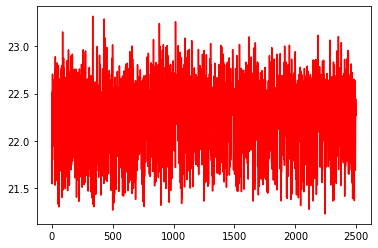

In [44]:
# Plotting functionality starts here
plt.plot(predictions1, color = 'red')
plt.show()

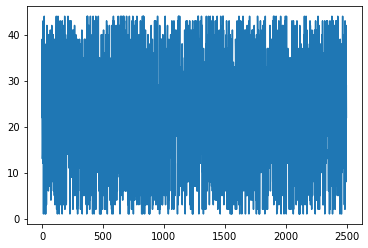

In [45]:
plt.plot(y_test.values.astype('float64'))
plt.show()

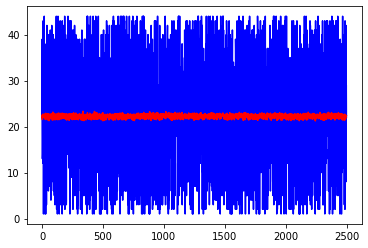

In [46]:
plt.plot(y_test.values.astype('float64'), color = 'blue')
plt.plot(predictions1, color = 'red')
plt.show()


In [47]:
print('Housing dataset')
print('linear model intercept: {:.3f}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Housing dataset
linear model intercept: 21.563
linear model coeff:
[-7.66861195e-04  1.22419754e-04  2.51743105e-05  1.84460495e-04
  9.58856271e-03  7.66861195e-04  1.07952067e-01 -5.03836711e-01
  6.37394633e-01  7.14574208e-01  4.66488813e-01 -2.91542198e-01]
R-squared score (training): 0.001
R-squared score (test): -0.002


In [48]:
#Test the models
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
x_test=preprocessing.normalize(X_test)
print(metrics.mean_squared_error(y_test,linreg.predict(x_test)))
print(metrics.mean_squared_error(y_test,linreg.predict(x_test)))

161.3385452477516
161.3385452477516


In [49]:
#Test the models
#import sklearn.metrics as metrics
#import sklearn.preprocessing as preprocessing
x_test=preprocessing.normalize(X_train)
print(metrics.mean_squared_error(y_train,linreg.predict(x_test)))
#print(metrics.mean_squared_error(y_test,linreg.predict(x_test)))

164.05098231250625
